<a href="https://colab.research.google.com/github/hwapyeong-lee/hp/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%202%EC%9E%A5%20%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 혼공머신 2장

### 머신러닝 알고리즘

**1. 지도학습**
- 훈련하기 위한 정답(입력)과 데이터(타깃) 필요함.
       --> 훈련 데이터(입력+타깃)가 필요함.

**2. 비지도 학습**

- 타깃이 없이 입력 데이터만 사용함.
       --> 정답 맞히지 못해도 데이터 파악과 변형에 도움을 줌.

**3. 강화 학습**

- 타깃을 사용하지 않고 알고리즘의 행동 결과로 얻느니 보상 사용해 학습함.


-------------------------------------------------------------------------------



## 2-1. **훈련 세트와 데이터 세트**
  - 훈련과 평가의 데이터가 같다면 당연히 모두 맞춤.
  - 훈련 데이터(train set)와 평가 데이터(test set)가 달라야 함.
    - 평가를 위해 다른 데이터를 준비하거나/훈련 데이터에서 일부를 떼어 활용




--> 훈련 데이터에서 일부를 떼어 활용한 예시

In [36]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 +[0]*14

-- 생선 데이터 하나를 샘플이라고 할 때 총 49개의 샘플이 있음.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

-- 사이킷런 클래스 import 하고 모델 객체 생성함.

In [38]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [57]:
print(train_input)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]


-- 슬라이싱 연산자로 인덱스 0~ 34까지 처음 35개 샘플을 train set으로, 35~48까지 14개 샘플을 test set으로 선택함.

In [39]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

-- test set에는 빙어만 있기 때문에 **샘플링 편향**이 일어났고 두 데이터를 골고루 섞어줘야함.

In [ ]:
import numpy as np

-- 파이썬 리스트를 numpy 배열로 변환하기 위해 대표적 배열 라이브러리안 numpy를 import함.

In [41]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [42]:
print(input_arr.shape) #샘플 수 , 특성 수를 출력함.

(49, 2)


In [45]:
np.random.seed(42) #재현성을 위해 랜덤 시드를 지정
index = np.arange(49) #48까지 1씩 증가하는 배열을 만듦.
np.random.shuffle(index) #주어진 배열을 무작위로 섞음

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [46]:
print(input_arr[[1,3]]) #2차 배열을 사용하여 여러 원소를 선택하는 배열 인덱싱 기능 제공

[[ 26.3 290. ]
 [ 29.  363. ]]


In [47]:
train_input = input_arr[index[:35]] #앞에서 섞은 패턴대로 재배치를 해줌.
train_target = target_arr[index[:35]]

print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


-- index의 첫 번째 값이 13이므로 train_input의 첫 번째 원소에는 input_arr의 열 네번째 원소가 들어있음.

In [49]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

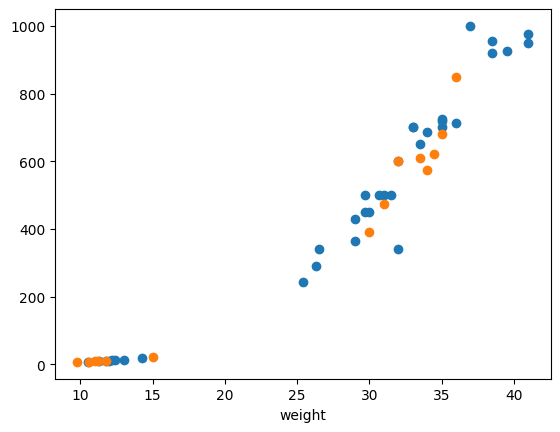

In [50]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [52]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [55]:
kn.predict(test_input) #넘파이 배열을 반환함.

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [56]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

---------------------------------------------------------------------------------------------------
## 2-2. **데이터 재배치**


In [67]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [68]:
import numpy as np

np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [69]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [70]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [75]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [72]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [73]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [76]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


-- 원래 두 생선의 비율보다 도미의 비율이 더 높아 샘플링 편향이 나타남.

In [78]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

-- stratify가 샘플링 편향을 줄여줌.

In [79]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


-- 두 생선의 원래 비율에 맞춰 골고루 출력됨.